# Solutions

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Files" data-toc-modified-id="Files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Files</a></span></li><li><span><a href="#Regular-Expressions" data-toc-modified-id="Regular-Expressions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regular Expressions</a></span></li><li><span><a href="#Project-–-The-Invoices" data-toc-modified-id="Project-–-The-Invoices-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Project – The Invoices</a></span></li><li><span><a href="#Web-Scraping" data-toc-modified-id="Web-Scraping-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Web Scraping</a></span></li><li><span><a href="#Data-Alteration-Techniques" data-toc-modified-id="Data-Alteration-Techniques-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Alteration Techniques</a></span></li><li><span><a href="#Pandas" data-toc-modified-id="Pandas-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pandas</a></span></li></ul></div>

## Files

**1.2.3 File creator function**

Ok, so a function that creates a plaintext file! There are a bunch of ways to do this. But this is how I would do it. As always, I try to base the solutions of what has been taught so far in the course.

First, we import the `Path` class from the `pathlib` module:

In [1]:
from pathlib import Path

Since we will use the `Path` class in our function, we must convert the first parameter to a path object. Why? Because some users may pass a string value as the path, and strings don't have the method `.is_absolute()`. It would crash!

In [2]:
def file_creator(path, content):
    path = Path(path)
    if not path.is_absolute():
        print("The path you provided isn't working.",
              "It should be an absolute path, try again!")
        return
    else:
        if not ".txt" in str(path):
            print("You must include a textfile in your path!")
            return
        else:
            with path.open("w") as file:
                file.write(content)

I also included the if-statement `if not ".txt" in str(path):`. If the user forgets to include a filename in their path, the function will crash. Else, the context manager pattern with a `with`-statement will create a new file.

The if-statement checks to see _"if there isn't a file extension in the path, print a warning!"_ It does so by checking if the string ".txt" isn't in the path. But this will only work if we convert the path into a string value, hence the `str(path)`. Path objects can't be looped over (they aren't iterable).

If we pass something that isn't an absolute path, such as an empty string, the function will warn us and abort:

In [3]:
file_creator("","Hello")

The path you provided isn't working. It should be an absolute path, try again!


Here's an absolute path to try on:

In [4]:
path = Path.cwd() / "new_file.txt"

In [5]:
file_creator(path,"This is a new file!")

In [6]:
with path.open("r") as file:
    print(file.read())

This is a new file!


In [7]:
# run this if you wan't to delete the file:
path.unlink()

**1.3 Exercise – move the textfiles**

Ok! First we run the provided code to create all the files:

In [63]:
import shutil
import os

from random import randint, seed

seed(30)

# First, create tree of directories
path = Path('exercise')
if os.path.isdir(path):
    shutil.rmtree(path)
    os.mkdir(path)
    os.mkdir(path / 'old_location')
    os.mkdir(path / 'new_location')
else:
    os.mkdir(path)
    os.mkdir(path / 'old_location')
    os.mkdir(path / 'new_location')

# This following code randomly creates 500 files
file_path = Path('exercise/old_location')
for i in range(500):
    # random number to decide file extension of present sequence
    num = randint(0,1)
    # if 'num' equals 0 -> plaintext, otherwise pythonfile
    file_ext = ".txt" if num == 0 else ".py"
    
    # Here to decide file content
    if file_ext == '.txt':
        text = "This is a plaintext file!"
    else:
        text = "# this is a python file"
        
    # finally, writing and closing the file
    file = open(file_path / f"file_{randint(500,10000)}{file_ext}","w")
    file.write(text)
    file.close()


Righty!

So, in this exercise, we need to copy and move a whole bunch of files, using a function, from "old_location" to "new_location". We should also include code that add the current date as part of each files name when moved. Let's do a small TODO schematic:

In [64]:
# TODO – define function

# TODO – convert potential path strings into path objects

# TODO – find all files in old_location, save to list

# TODO – filter all text files

# TODO – loop over our text files

# TODO – rename each file with date

# TODO – create file paths for each file

# TODO – copy each file

# TODO – move each copy to 'new_location'

# TODO – create path variables for the two locations

A pretty scary long list, right? Well, it's actually not that bad, since alot of these TODOs will be done together in one go. Let's start:

In [65]:
# TODO – define function
def move_files(location_A, location_B, date):
    # TODO – convert potential path strings into path objects
    location_A, location_B = Path(location_A), Path(location_B)
    
    # TODO – find all files in old_location, save to list
    all_files = os.listdir(location_A)

    # TODO – filter all text files
    all_txt_files = []
    
    for file in all_files:
        if file.endswith(".txt"):
            all_txt_files.append(file)
        else:
            continue


    # TODO – loop over our text files
    for file_name in all_txt_files:
        
        # TODO – rename each file with date
        new_file_name = f"{date}_{file_name}"
        
        # TODO – create file paths for each file
        file_path_1 = old_loc / file_name
        file_path_2 = new_loc / new_file_name
        
        # TODO – copy each file
        # TODO – move each copy to 'new_location'
        shutil.copy(file_path_1,file_path_2)
    
    print(f"All {len(all_txt_files)} text files copied and moved!")
        
# TODO – create path variables for the two locations
old_loc = Path("exercise/old_location")
new_loc = Path("exercise/new_location")

In [66]:
move_files(old_loc, new_loc, "2020-10-15")

All 262 text files copied and moved!


Let's have a look in the "new_location" to see if it worked (only showing 10 here):

In [67]:
os.listdir(new_loc)[:10]

['2020-10-15_file_4286.txt',
 '2020-10-15_file_7200.txt',
 '2020-10-15_file_3099.txt',
 '2020-10-15_file_2387.txt',
 '2020-10-15_file_2556.txt',
 '2020-10-15_file_6042.txt',
 '2020-10-15_file_8709.txt',
 '2020-10-15_file_6081.txt',
 '2020-10-15_file_1513.txt',
 '2020-10-15_file_6254.txt']

Dates are now added to the files' name! All in all there are 262 text files, which means there are more text files than python files. 

Remember, if you just change the file extension in our function. This would work for any type of file you have, anywhere on your computer! Maybe you can find som use out of it somewhere? Have fun!

(run this following code if you want to remove all exercise folders and files:)

In [68]:
shutil.rmtree("exercise/")

**1.5 Exercise – pdf to text function**

Ok! To be able to get this done we need to first import the `PyPDF2` module and the `Path` class from the `pathlib` module:

In [5]:
import PyPDF2

from pathlib import Path

Let's do a TODO list:

In [6]:
# TODO – define a function with two parameters

# TODO – make sure that the two arguments are path objects

# TODO – using the pdf's path parameter, open the file in "rb" mode

# TODO – pass the opened file object to the PyPDF2's PdfFileReader class

# TODO – create empty string variable to add pdf text to

# TODO – create for-loop: loop over all the pdf's pages

# TODO – get page data

# TODO – add each page's text to the string variable

# TODO – save the string variable to a plaintext file object

# TODO – create two path objects to test our function on

# TODO – test the function!

So, quite a list! Let's get to work with our function. I'll just name it the same as in the course notebook!

In [7]:
# TODO – define a function with two parameters
def pdf_converter(pdf_path, results_path):
    
    # TODO – make sure that the two arguments are path objects
    pdf_path, results_path = Path(pdf_path), Path(results_path)

    # TODO – using the pdf's path parameter, open the file in "rb" mode
    file_object = open(pdf_path, "rb")
    
    # TODO – pass the opened file object to the PyPDF2's PdfFileReader class
    pdf_file = PyPDF2.PdfFileReader(file_object)

    # TODO – create empty string variable to add pdf text to
    pdf_content = ""

    # TODO – create for-loop: loop over all the pdf's pages
    for i in range(pdf_file.getNumPages()):
        # TODO – get page data
        page = pdf_file.getPage(i)
        
        # TODO – add each page's text to the string variable
        pdf_content += page.extractText()
        
    # TODO – save the string variable to a plaintext file object
    text_file = open(results_path,"w")
    
    text_file.write(pdf_content)
    text_file.close()


That's our function! Pretty straight forward actually, at least I think so. Hope you're still with me :)

Now, let's test the function to see if it works! I'll just try it on the same pdf file as in the course notebook. It is found in the "course_material" directory. I'll save the results in a plaintext file in the current working directory: 

In [17]:
# TODO – create two path objects to test our function on
path_to_pdf = Path("../course_material/report.pdf")
results_path = Path("report.txt") # important with file extension!


# TODO – test the function!
pdf_converter(path_to_pdf, results_path)

Let's open the newly created "report.txt":

In [18]:
file = open(results_path,"r")
text = file.read()

How long is the file?

In [19]:
len(text)

55344

The first 1000 characters:

In [20]:
text[:1000]

'Corporate governance report 2019\nH & M Hennes\n & Mauritz AB\nH & M Hennes & Mauritz AB is a Swedish public limited company. H&M™s \nclass B share is listed on Nasdaq Stockholm. H&M applies the Swedish \nCorporate Governance Code (the Code) and has prepared this corporate \ngovernance report in accordance with the Annual Accounts Act and the \nCode. H&M has applied the Code since 2005. The report, which covers \n\ndirectors and has been reviewed by the company™s auditors.\nH&M is governed by both external regulations and internal \n control documents.\n\n ŠThe Swedish Companies Act\n ŠAccounting legislation including the Swedish Bookkeeping Act \n and Annual Accounts Act\n ŠMAR, EU Market Abuse Regulation (596/2014/EU)\n ŠNasdaq Stockholm Rules for Issuers\n ŠThe General Data Protection Regulation (GDPR)\n ŠSwedish Corporate Governance Code (the Code), which is available \n\n\nmay deviate from individual rules provided they give an explanation of \nthe deviation, describe the chosen 

It seems to have worked! Yey!

In [21]:
# Uncomment this if you want to remove the results file:
#results_path.unlink()

## Regular Expressions

**2.4 Exercise – matching phone numbers**

In [12]:
import re

First, let's get the list:

In [13]:
with open("../course_material/phone_list.txt","r") as file:
    text = file.read()

In [14]:
print(text[:250])

Participant, Phone number
Bolsvik Jurgen, 0703-1901XX
Brumm,  Mats, 0707-2321XX
Carlsson,  Yngve, 0735-4474XX
Svensson,  Jan, 0730-2868XX
Ekstrom,  Torbjorn, 018-5115XX
Ekgren,  Stig, 0706-4084XX
Engdahl,  Jan, 0703-6826XX
Gripe,  Mats, 0735-6226XX
H


The cellphone numbers all start with "07", then more number digits, followed by a dash, then more numbers, and finally two "X" letters. Let's try and type a regex based on this:

In [15]:
p = "07\d+-\d+XX"

In [16]:
number_list = re.findall(p,text)

In [17]:
len(number_list)

31

There are 31 Swedish cellphone numbers in the list!

**2.6 Exercise – can you find the number?**

Let's start by importing the re module:

In [18]:
import re

We also need to get the speach and save it into a variable:

In [19]:
with open("../course_material/speach.txt","r") as file:
    text = file.read()

We know that the number we need to find comes _before_ the quote "refugees". This means that we can include this in our regular expression:

In [20]:
p = "refugees"

In [21]:
re.findall(p,text)

['refugees', 'refugees']

Ok, so Trump mentions the word "refugees" two times in the speach. Let's check what he sais just before the word "refugees". We can du this by including a blank space and the word character `\w`. The word character matches both alphabetical letters _and_ numerical digits! 

Since we want the _word_ in front of "refugees", we'll add the plus sign `+`, which means we want `\w` once or more times:

In [22]:
p = "\w+ refugees"

In [23]:
re.findall(p,text)

['become refugees', '000 refugees']

Ok! So the second match is the one we're interested in. But he obviously didn't say "000 refugees", there's more to it. However, how is numbers formatted in this speach? If Trump said "one hundred thousand refugees", is it typed:
```
"100.000"?
"100,000"?
"100 000"?
"100'000"?
```
They are all probable. To be certain, we'll not use any of them Instead, we're going to use the "not a word character"-special character `\W`. This matches all of the options above. Have a look:

In [24]:
p = "\W"
test = "., '"

re.findall(p, test)

['.', ',', ' ', "'"]

So let's include it in our search:

In [25]:
p = "\W\w+ refugees"

In [26]:
re.findall(p,text)

[' become refugees', ',000 refugees']

Let's exchange the word special character to digits `\d`, and then see the amount in front of the comma:

In [27]:
p = "\d+\W\d+ refugees"

re.findall(p,text)

['620,000 refugees']

Now, is there more? Is he, for example, saying "1,620,000 refugees"? Let's have a look by duplicating `\d+\W`, so the entire expression will be:

In [28]:
p = "\d+\W\d+\W\d+ refugees"

This should match on "1,620,000 refugees":

In [29]:
t = "1,620,000 refugees"

In [30]:
re.findall(p,t)

['1,620,000 refugees']

Let's check in Trump's speach:

In [31]:
re.findall(p,text)

[]

No hits! This means that the number president Trump is talking about, must be 620,000! Let's change the first `\d` into a word character instead and have a look:

In [32]:
p = "\w+\W\d+\W\d+ refugees"

In [33]:
re.findall(p,text)

['estimated 620,000 refugees']

Voilá!

One problem still remain though. This regular expression won't match any number, as was part of the exercise. This is, however, easily fixed! Let's go back to the expression just matching on the number, and the word "refugees":

In [34]:
p = "\d+\W\d+ refugees"

We can actually add a group over the first two characters in our expression, and then attach a repetition qualifier to this group. So instead of `\d+\W`, we'll type `(\d+\W)*`. This means that this pattern can occur zero, or more times. Have a look:

In [35]:
p = "((\d+\W)*\d+ refugees)"

_(I've also added a group that encloses the entire expression. This is just so that all hits will be displayed when I use the `.findall()` method here below)_

This pattern will now match any number we give it, if it's followed by the string " refugees":

In [36]:
t = "1,123,032 refugees"
re.findall(p,t)

[('1,123,032 refugees', '123,')]

In [37]:
t = "32 refugees"
re.findall(p,t)

[('32 refugees', '')]

In [38]:
t = "54,654,721,321 refugees"
re.findall(p,t)

[('54,654,721,321 refugees', '721,')]

There you go! It now matches any number!

**2.9 Exercise – Who has landlines?**

First, let's get the list:

In [39]:
import re

file = open("../course_material/phone_list.txt","r")
text = file.read()
file.close()

Here, I will try to write a regex that captures each row in the list, and then use a group to catch peoples' names. Each row in the list ends with a newline character. That will be our breaking point. SOmetimes, I find it easier if you try to divide the string into parts that you then can deconstruct!

Let's write a regex:

In [40]:
p = ",\s\w+-\w+\n"

In [41]:
re.findall(p, text)[:10]

[', 0703-1901XX\n',
 ', 0707-2321XX\n',
 ', 0735-4474XX\n',
 ', 0730-2868XX\n',
 ', 018-5115XX\n',
 ', 0706-4084XX\n',
 ', 0703-6826XX\n',
 ', 0735-6226XX\n',
 ', 018-2066XX\n',
 ', 0738-2149XX\n']

So this regex catches all phone numbers in the list (plus the comma and the blank space that preceds the number). Let's see if we can capture all numbers where the second digit isn't a seven – since "07" is phone numbers:

In [42]:
p = ",\s0[^7]\d+-\w+\n"

In [43]:
re.findall(p, text)[:10]

[', 018-5115XX\n',
 ', 018-2066XX\n',
 ', 018-4611XX\n',
 ', 018-5007XX\n',
 ', 018-3213XX\n',
 ', 018-3005XX\n']

There we go! So to recap, I'll go through the regex character per character: 
1. the above regex will capture all strings that start with a comma `,`
2. any type of whitespace character `\s` (whitespace characters are blankspace, newlines, tabs etc…)
3. the digit zero `0`
4. NOT the number seven – `[^7]`
5. one or more numerical digits `\d+`
6. a literal dash character `-`
7. one or more word characters `\w+` (remember that these captures numerical digits as well)
8. a newline character `\n`

Now, we just need to add regex syntax to capture the names on these rows. Let's type a name finding regex by itself first, then combining it with the landline finding regex above later.

Each name is separated by a comma and a space, so let's use that in the regex. However, looking at the top of the list, the comma doesn't seem to be included in all rows:

In [44]:
print(text[:54])

Participant, Phone number
Bolsvik Jurgen, 0703-1901XX



So there may or may not be a comma. We'll include a comma with a star to cover our bases `,*`:

In [45]:
# now looking for each name
p = "[A-Z][a-z]+,*\s[A-Z][a-z]+"

In [46]:
re.findall(p,text)

['Participant, Phone', 'Bolsvik Jurgen']

Huh? Only catching first two rows, why is that? Maybe there's more than one blankspace inbetween each surname and name? Let's check:

In [47]:
p = "[A-Z][a-z]+,*\s+"

In [48]:
re.findall(p,text)[:5]

['Participant, ', 'Phone ', 'Bolsvik ', 'Jurgen, ', 'Brumm,  ']

That seems to be the issue. Let's modify:

In [49]:
p = "[A-Z][a-z]+,*\s+[A-Z][a-z]+"

In [50]:
re.findall(p,text)[:10]

['Participant, Phone',
 'Bolsvik Jurgen',
 'Brumm,  Mats',
 'Carlsson,  Yngve',
 'Svensson,  Jan',
 'Ekstrom,  Torbjorn',
 'Ekgren,  Stig',
 'Engdahl,  Jan',
 'Gripe,  Mats',
 'Hakku,  Tommy']

This seems to have worked great! Now let's combine the two regex's. Since a regex pattern is such an eye soar, if I'm writing a longer regex, I sometimes save parts of the patterns in variables. Then, use the variables in a f-string that I use as my final regex pattern. It makes it a little bit more readable, in my opinion. I'll show you what I mean:

In [51]:
all_names = "[A-Z][a-z]+,*\s+[A-Z][a-z]+"
all_landlines = ",\s0[^7]\d+-\w+\n"

In [52]:
p = f"{all_names}{all_landlines}"

In [53]:
re.findall(p, text)

['Ekstrom,  Torbjorn, 018-5115XX\n',
 'Hakku,  Tommy, 018-2066XX\n',
 'Harrysson,  Peder, 018-4611XX\n',
 'Helgsson,  Kurt, 018-5007XX\n',
 'Langefors,  Arvid, 018-3213XX\n',
 'Roos,  Anne, 018-3005XX\n']

Tada! Since we only want the names, let's group that part of the regex:

In [54]:
p = f"({all_names}){all_landlines}"

In [55]:
re.findall(p, text)

['Ekstrom,  Torbjorn',
 'Hakku,  Tommy',
 'Harrysson,  Peder',
 'Helgsson,  Kurt',
 'Langefors,  Arvid',
 'Roos,  Anne']

Those six people have landlines!

## Project – The Invoices

It's standard practice to always start with all your imports. Here's what we'll be using:

In [1]:
import os
import PyPDF2
import re

from pathlib import Path

Let's first get a list of all pdf-files:

In [2]:
path = Path('project')
files = os.listdir(path)

We'll need check out what the pdf-files look like as strings. Knowing this, we can write regular expressions to extract the information we're interested in:

In [3]:
with open(path / files[0],"rb") as file:
    pdf_file = PyPDF2.PdfFileReader(file)
    page = pdf_file.getPage(0)
    print(page.extractText())


Invoice date: 2020-01-24

Invoice for services in accordance with #T542AA1, Chap 3
--------------------------------------------------------


Total expenditure: SEK 72,846

------
Our contact: Fredrik Månsson (841012-8668)




In [4]:
text_example = page.extractText()

In [5]:
text_example

'\nInvoice date: 2020-01-24\n\nInvoice for services in accordance with #T542AA1, Chap 3\n--------------------------------------------------------\n\n\nTotal expenditure: SEK 72,846\n\n------\nOur contact: Fredrik Månsson (841012-8668)\n\n'

It worked! But to make things a bit more clean, let's put this code in a function that we can just simply call in each sequence when we loop over all the files:

In [6]:
def read_pdf(file_path):
    
        page = pdf_file.getPage(0)
        return page.extractText()

In [7]:
read_pdf(path/files[0])

'\nInvoice date: 2020-01-24\n\nInvoice for services in accordance with #T542AA1, Chap 3\n--------------------------------------------------------\n\n\nTotal expenditure: SEK 72,846\n\n------\nOur contact: Fredrik Månsson (841012-8668)\n\n'

We have a small problem though. What if there is an invoice with more than one page? Let's do a loop in the function to be on the safe side:

In [8]:
pdf_file.getNumPages()

1

In [9]:
def read_pdf(file_path):
    with open(file_path,"rb") as file:
        pdf_file = PyPDF2.PdfFileReader(file)
    
        text = ""
        for i in range(pdf_file.getNumPages()):
            page = pdf_file.getPage(i)
            text += page.extractText()

    return text

In [10]:
text_example = read_pdf(path/files[0])

In [11]:
text_example

'\nInvoice date: 2020-01-24\n\nInvoice for services in accordance with #T542AA1, Chap 3\n--------------------------------------------------------\n\n\nTotal expenditure: SEK 72,846\n\n------\nOur contact: Fredrik Månsson (841012-8668)\n\n'

Perfect! Let's move on.

After looking through a sample of the files, they all seem to have the same layout. 

The text within the files is pretty straight forward. Let's make a todo-list of the regexes we need:

In [12]:
# TODO – get date

# TODO – get name of contact

# TODO – get social security number of contact

# TODO – get charged amount 

Let's go through them one by one:

In [13]:
# TODO – get date
date_p = "Invoice date: (\d+-\d+-\d+)"
re.search(date_p, text_example).group(1)

'2020-01-24'

That worked fine! Let's move on:

In [14]:
# TODO – get name of contact
name_p = "Our contact: (\w+\s*\w+) \(\d+-\d+\)"
mo = re.search(name_p, text_example)
print(mo.group(1))

Fredrik Månsson


Swedish names (or, rather, names in general) are notoriously hard to pin point with regular expressions. Some people have double first names (like "Ann Charlotte", or "Ann-Charlotte", or even "AnnCharlotte"), some have double surnames ("Larsson Nilsson", or "Larsson-Nilsson", or "L Nilsson"). So the name regex is to consider a bonus info. Best to get it just in case some invoice don't include any social security number.

But, if we shall use above regex, we're gonna need a try/except-statement. It may not find any groups, and if so, the `.search()` method will return `None`. Let's check which error will be produced if we try to call a group that doesn't exist:

In [15]:
re.search(name_p, text_example).group(45) # there isn't any group 45

IndexError: no such group

Cool! Let's build our regex again, but with a try/except-statement:

In [16]:
try:
    name_p = "Our contact: (\w+\s*\w+) \(\d+-\d+\)"
    mo = re.search(name_p, text_example)
    print(mo.group(1))
except IndexError:
    print("Name not found")

Fredrik Månsson


Great, let's move on:

In [81]:
text_example

'\nInvoice date: 2020-01-24\n\nInvoice for services in accordance with #T542AA1, Chap 3\n--------------------------------------------------------\n\n\nTotal expenditure: SEK 72,846\n\n------\nOur contact: Fredrik Månsson (841012-8668)\n\n'

In [82]:
# TODO – get social security number of invoices' contacts
soc_num_p = "\((\d{6}-*\d{4})\)"
mo = re.search(soc_num_p, text_example)
print(mo.group(1))

841012-8668


That worked fine, but just in case, let's include try/except-clauses in all our regexes:

In [83]:
try:
    soc_num_p = "\((\d{6}-*\d{4})\)"
    mo = re.search(soc_num_p, text_example)
    print(mo.group(1))
except IndexError:
    print("Social security number not found")

841012-8668


In above pattern, there should be parenthesis around the social security number. To include parenthesis in our regex, we need to cancel them out – `\(` and `\)` – since a bracket otherwise symbolises regex groups. I also put a star `*` after the dash, in case it isn't included in some invoices.

In [84]:
# TODO – get charged amount 
try:
    exp_p = "SEK\s*((\d+,)*\d+)"
    mo = re.search(exp_p, text_example)
    print(mo.group(1))
except IndexError:
    print("Charged amount not found")

72,846


Here, the regex pattern was also pretty straight forward. However, we will need to do something about the number format. Since we want to calculate sums on the charged amount later on, we're going to need to convert it into an integer. That won't work if there is commas in the string. 

Let's use the string method `.replace()` on the returned matched string to replace the comma. Then convert the charged amount to an integer:

In [85]:
try:
    exp_p = "SEK\s*((\d+,)*\d+)"
    mo = re.search(exp_p, text_example)
    amount = mo.group(1)
    # replace string's commas to empty strings and convert number to integer
    amount = int(amount.replace(",",""))
    print(amount)
except IndexError:
    print("Charged amount not found")

72846


Great! We now have code that can gather all information we need from the files. But since we want as little duplicated code as possible, let's put the regex matching in a function that we can reuse, and the patterns by themselves:

In [86]:
def pattern_matching(pattern, text, group):
    try:
        mo = re.search(pattern, text)
        return mo.group(group)
    except IndexError:
        return "No match"

Now, let's save all regex patterns into a dictionary:

In [87]:
date_p

'Invoice date: (\\d+-\\d+-\\d+)'

In [88]:
patterns = {
    'date': date_p,
    'name': name_p,
    'soc_num': soc_num_p,
    'exp': exp_p
}

Let's do the same with the matches:

In [89]:
matches = {
    'date': pattern_matching(patterns['date'], text_example, 1),
    'name': pattern_matching(patterns['name'], text_example, 1),
    'soc_num': pattern_matching(patterns['soc_num'], text_example, 1),
    'exp': pattern_matching(patterns['exp'], text_example, 1),
}

Let's put this build of our matching dictionary in a function as well:

In [90]:
def file_matching(file_text, patterns):
    return {
    'date': pattern_matching(patterns['date'], file_text, 1),
    'name': pattern_matching(patterns['name'], file_text, 1),
    'soc_num': pattern_matching(patterns['soc_num'], file_text, 1),
    'exp': pattern_matching(patterns['exp'], file_text, 1),
    }

In [91]:
matches = file_matching(text_example,patterns)

Remember that we need to change the charged amount into an integer? Let's put that code in a function as well:

In [92]:
def convert_charged_amount(string_amount):
    amount = string_amount.replace(",","")
    return int(amount)

Now, let's fix that string in our `matches` dictionary:

In [93]:
matches['exp'] = convert_charged_amount(matches['exp'])
matches

{'date': '2020-01-24',
 'name': 'Fredrik Månsson',
 'soc_num': '841012-8668',
 'exp': 72846}

Great! This code can now be used over and over when we loop over all files. We can save each `matches` dictionary as an item in a list! Then we have all information collected in a tidy and clean data structure!

Let's build our loop, and then run it over the 10 first files:

In [94]:
path = Path('project')
all_matches = []
for file in files[:5]:
    
    file_text = read_pdf(path / file)
    
    matches = file_matching(file_text,patterns)
    
    # let's also add the file name to the dictionary
    matches['file'] = file
    
    all_matches.append(matches)

Let's have a look at the result:

In [95]:
all_matches

[{'date': '2020-01-24',
  'name': 'Fredrik Månsson',
  'soc_num': '841012-8668',
  'exp': '72,846',
  'file': '1483488000.pdf'},
 {'date': '2016-03-28',
  'name': 'Kjell Månsson',
  'soc_num': '700307-6956',
  'exp': '45,470',
  'file': '1171065600.pdf'},
 {'date': '2018-02-16',
  'name': 'Adam Olofsson',
  'soc_num': '730118-9448',
  'exp': '59,511',
  'file': '1473379200.pdf'},
 {'date': '2019-04-20',
  'name': 'Fredrik Månsson',
  'soc_num': '841012-8668',
  'exp': '191,871',
  'file': '1469145600.pdf'},
 {'date': '2017-07-16',
  'name': 'Kristina Strömberg',
  'soc_num': '680515-8461',
  'exp': '36,390',
  'file': '1402099200.pdf'}]

Whoops! We forgot to convert the charged amount to integers! Let's include that into the loop and then run all files:

In [96]:
path = Path('project')
all_matches = []
for file in files:
    
    file_text = read_pdf(path / file)
    
    matches = file_matching(file_text,patterns)
    matches['exp'] = convert_charged_amount(matches['exp'])
    
    # let's also add the file name to the dictionary
    matches['file'] = file
    
    all_matches.append(matches)

In [97]:
len(all_matches)

5000

In [98]:
all_matches[:5]

[{'date': '2020-01-24',
  'name': 'Fredrik Månsson',
  'soc_num': '841012-8668',
  'exp': 72846,
  'file': '1483488000.pdf'},
 {'date': '2016-03-28',
  'name': 'Kjell Månsson',
  'soc_num': '700307-6956',
  'exp': 45470,
  'file': '1171065600.pdf'},
 {'date': '2018-02-16',
  'name': 'Adam Olofsson',
  'soc_num': '730118-9448',
  'exp': 59511,
  'file': '1473379200.pdf'},
 {'date': '2019-04-20',
  'name': 'Fredrik Månsson',
  'soc_num': '841012-8668',
  'exp': 191871,
  'file': '1469145600.pdf'},
 {'date': '2017-07-16',
  'name': 'Kristina Strömberg',
  'soc_num': '680515-8461',
  'exp': 36390,
  'file': '1402099200.pdf'}]

Everything seems to be in order! Now to the tricky part. The calculations! 

We'll start with calculating how big each persons total charged amount is. First, a todo-list:

In [99]:
# TODO – unique list of all social security numbers

# TODO – sum up all charges per social security number

To get each unique social security number, we can create an empty dictionary and then use the dictionary method `.setdefault()`. Let me show you what I mean:

In [100]:
# TODO – unique list of all social security numbers
unique_soc_nums = {}

for match in all_matches:
    sequence_number = match['soc_num']
    
    unique_soc_nums.setdefault(sequence_number, {'invoice_nums':0})
    unique_soc_nums[sequence_number]['invoice_nums'] += 1

In [101]:
list(unique_soc_nums.items())[:5]

[('841012-8668', {'invoice_nums': 46}),
 ('700307-6956', {'invoice_nums': 45}),
 ('730118-9448', {'invoice_nums': 39}),
 ('680515-8461', {'invoice_nums': 43}),
 ('720806-7526', {'invoice_nums': 49})]

Each loop begins with an assignment statement where we save the present sequence social security number to the variable `sequence_number`. So in the first loop that is:

In [102]:
all_matches[0]

{'date': '2020-01-24',
 'name': 'Fredrik Månsson',
 'soc_num': '841012-8668',
 'exp': 72846,
 'file': '1483488000.pdf'}

...'841012-8668'. This string is then passed as an argument to the `.setdefault()` method. In the first loop, since the dictionary `unique_soc_nums` is empty, the string is added to the empty dictionary as a key. To this key, a dictionary is added as its value. This nested dictionary has a key called `'invoice_nums'` with the value 0. Then the value is increased by 1. If the social security number already exists as a key in `unique_soc_nums`, the nested dictionary's `'invoice_nums'` is increased by 1. The resulting `unique_soc_nums` dictionary shows us two things:
1. All its keys are the unique social security numbers in all the invoice files
2. The value in each key/value pair is in how many invoices each social security number is the contact

So, we now know all individual social security numbers that are presented as "Contact" in the files:

In [103]:
# TODO – unique list of all social security numbers
unique_soc_nums.keys()

dict_keys(['841012-8668', '700307-6956', '730118-9448', '680515-8461', '720806-7526', '901019-8775', '840513-6554', '600818-7143', '770314-2749', '540911-0133', '780810-5782', '760831-3479', '770323-7384', '640330-2804', '520213-8895', '540823-9269', '740821-1817', '671112-3502', '900730-9469', '531030-3629', '810305-7056', '911027-0938', '670909-3033', '700903-4314', '890724-4379', '700225-0042', '750703-8558', '570629-9445', '660927-8714', '940103-3868', '640503-1311', '920920-6187', '541019-1859', '920130-6937', '550701-4881', '600829-5255', '620720-6124', '901013-3361', '670627-4033', '680926-0301', '600805-6177', '700214-5706', '930522-9678', '611110-9558', '541106-8358', '690406-7234', '650404-1414', '850426-9791', '730414-7637', '851202-0536', '880822-4785', '800209-5827', '550124-2383', '931224-6674', '770108-8024', '630723-0537', '610202-3691', '580819-0639', '551215-6433', '891116-0796', '800405-4607', '570710-4152', '830213-3176', '601115-1721', '531126-8762', '611206-6034',

Now, let's calculate how much each person has charged the agency. We can actually continue using this `unique_soc_nums` dictionary. If we loop over `all_matches` we can simply add the value of `all_matches[i]['exp']` to each social security number in `unique_soc_nums`. Let me show you what I mean:

First, if we loop over `all_matches`, in each sequence – `all_matches[i]` – the sequence item is a dictionary with each file's scraped info saved in a dictionary. Each sequence's dictionary has one key called `soc_num` with info on who is the invoice's contact person. We can use this to match with our `unique_soc_nums` dictionary. Have a look:

In [104]:
# TODO – sum up all charges per social security number
for invoice_info in all_matches:
    soc_num = invoice_info["soc_num"]
    unique_soc_nums[soc_num].setdefault('amount',0)
    unique_soc_nums[soc_num]['amount'] += invoice_info['exp']
    
    # I'll also add the name for convience
    unique_soc_nums[soc_num].setdefault('name','')
    unique_soc_nums[soc_num]['name'] = invoice_info['name']

So, let's find the top 10 biggest debitors. This is tricky. I will first show you a method based on what we've learned so far in the course. Then, I'll show you how to do it with `pandas` – a fantastic module when working with data. 

We can first extract the top 10 values from the dictionary by using the `.values()` method, and then looping over each resulting dictionary:

In [105]:
amounts = list(unique_soc_nums.values())
amounts[:5]

[{'invoice_nums': 46, 'amount': 4911278, 'name': 'Fredrik Månsson'},
 {'invoice_nums': 45, 'amount': 5627908, 'name': 'Kjell Månsson'},
 {'invoice_nums': 39, 'amount': 3509020, 'name': 'Adam Olofsson'},
 {'invoice_nums': 43, 'amount': 4158780, 'name': 'Kristina Strömberg'},
 {'invoice_nums': 49, 'amount': 4904589, 'name': 'Christoffer Eliasson'}]

In [106]:
all_amounts = []
for dictionary in amounts:
    all_amounts.append(dictionary['amount'])

Let's start, though, by checking the mean debitor's charged amount. Just so have something to compare to:

In [107]:
sum(all_amounts) / len(all_amounts)

5632636.45

Now let's sort  `all_amounts` with the `sorted()` function. This function has the parameter `reverse` which we can set to `reverse=True` to get the top-10:

In [108]:
sorted(all_amounts, reverse=True)[:10]

[36674240,
 15880560,
 12930381,
 12276813,
 7531604,
 6462500,
 6448339,
 6439463,
 6405531,
 6386916]

We immediatly see that four sums clearly stands out. The fourth biggest debitor is almost twice as large as the fifth. The rest is kind of close to eachother. Let's focus on the top-4. We'll save them to a list:

In [109]:
big_debits = sorted(all_amounts, reverse=True)[:4]

In [110]:
big_debits

[36674240, 15880560, 12930381, 12276813]

In [111]:
big_debits[0] / 5632636.45

6.511025578439383

The biggest debitor has charged the agency more than 6.5 times the average amount.

Since we know these numbers are uniques (there aren't any duplicates in `big_debits`) we can now loop over the keys in `unique_soc_nums` to find the big debitors!

In [112]:
suspects = []
for key in unique_soc_nums.keys():
    data = unique_soc_nums[key]
    if data['amount'] in big_debits:
        suspect = {}
        suspect['name'] = data['name']
        suspect['soc_num'] = key
        suspect['amount'] = data['amount']
        suspects.append(suspect)

In [113]:
suspects

[{'name': 'Lucas Lundgren', 'soc_num': '780810-5782', 'amount': 15880560},
 {'name': 'Per Nyström', 'soc_num': '570710-4152', 'amount': 36674240},
 {'name': 'Caroline Hellström', 'soc_num': '610213-9525', 'amount': 12930381},
 {'name': 'Georg Hermansson', 'soc_num': '811115-8358', 'amount': 12276813}]

There we go! **Per Nyström is – by far – the biggest debitor!**

Before we move on, here how we would've found the top-10 biggest debitors using the `pandas` module on our dictionary:

In [115]:
import pandas as pd

In [116]:
pd.DataFrame(unique_soc_nums).T.sort_values('amount',ascending=False).head(10)

,invoice_nums,amount,name
570710-4152,37,36674240,Per Nyström
780810-5782,53,15880560,Lucas Lundgren
610213-9525,45,12930381,Caroline Hellström
811115-8358,48,12276813,Georg Hermansson
580819-0639,58,7531604,Karolina Isaksson
800405-4607,64,6462500,Anneli Lindberg
570322-7928,55,6448339,Linus Wallin
911027-0938,63,6439463,Per Berg
760831-3479,64,6405531,Maria Strömberg
740821-1817,58,6386916,Anette Löfgren


_One line of code!!_ Again, I really recommend learning pandas when you've got the chance!

Moving on..

Ok, so we've found the biggest debitors. Now to find out how much that have been charged per year. We can use the same techniques as above. Let's start by creating a dictionary with each year as a key, and then add all the invoices of that year as the key's values:

In [117]:
all_matches[0]

{'date': '2020-01-24',
 'name': 'Fredrik Månsson',
 'soc_num': '841012-8668',
 'exp': 72846,
 'file': '1483488000.pdf'}

In [118]:
yearly_costs = {}
for match in all_matches:
    year = match['date'][:4]
    
    yearly_costs.setdefault(year, 0)
    yearly_costs[year] += match['exp']

In [119]:
yearly_costs

{'2020': 15920663,
 '2016': 136460450,
 '2018': 145381809,
 '2019': 137303132,
 '2017': 128197591}

Here's just some code to clean it up a bit. It's not code covered in the course, so don't worry if you don't understand what does what (But if you're curious, google it and try to find out!):

In [120]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

dict(zip(yearly_costs.keys(),[f"SEK {x:n}" for x in yearly_costs.values()]))

{'2020': 'SEK 15,920,663',
 '2016': 'SEK 136,460,450',
 '2018': 'SEK 145,381,809',
 '2019': 'SEK 137,303,132',
 '2017': 'SEK 128,197,591'}

Ok, so 2018 was the year with the biggest costs for the agency.

**Finally, the bonus assignement!**

Let's check to see if anyone employed at the agency has been breaking agency policy by selling the agency third party services. Let's start by opening the text file with all the employees' social security numbers:

In [121]:
with open("../course_material/employees.txt","r") as file:
    employees = file.read()

In [122]:
employees[:100]

'510115-8394,510128-8721,510311-3447,510422-4384,510624-9382,510805-8611,520206-3043,520213-8896,5202'

Ok, so the employee-list is just a string with the social security numbers separated with commas. We can use the string method `.split()` with the argument `","` to divide the string into a list of string values:

In [123]:
employees = employees.split(",")
employees[:10]

['510115-8394',
 '510128-8721',
 '510311-3447',
 '510422-4384',
 '510624-9382',
 '510805-8611',
 '520206-3043',
 '520213-8896',
 '520215-8201',
 '520226-0172']

If we do a for-loop over the employee-list, we can check to see if any of the employees are in the invoice data. If we just check the social security number as a key to the `unique_soc_nums` variable, we will get a `KeyError` on all numbers that aren't keys in that variable. But if we include try/except-clauses, we can get around that problem. Have a look:

In [124]:
shady_employees = {}
for employee in employees:
    try:
        shady_employees[employee] = unique_soc_nums[employee]
    except KeyError:
        continue

In [125]:
len(list(shady_employees.keys()))

9

There are 9 people employed at the agency that are also acting as contacts, debiting the agency millions of Swedish Krona (SEK) through the company's invoices. Here's their details:

In [126]:
shady_employees

{'611230-9128': {'invoice_nums': 43,
  'amount': 4279656,
  'name': 'Gunnar Åberg'},
 '700307-6956': {'invoice_nums': 45,
  'amount': 5627908,
  'name': 'Kjell Månsson'},
 '730118-9448': {'invoice_nums': 39,
  'amount': 3509020,
  'name': 'Adam Olofsson'},
 '731215-0492': {'invoice_nums': 41, 'amount': 3900421, 'name': 'Linus Åberg'},
 '760715-9482': {'invoice_nums': 56,
  'amount': 5242601,
  'name': 'Olof Lundgren'},
 '781209-8978': {'invoice_nums': 50,
  'amount': 5126015,
  'name': 'Bengt Björklund'},
 '810305-7056': {'invoice_nums': 51,
  'amount': 5198295,
  'name': 'Christoffer Holm'},
 '820111-5266': {'invoice_nums': 46, 'amount': 4705236, 'name': 'Lars Björk'},
 '820911-7826': {'invoice_nums': 56, 'amount': 5404565, 'name': 'Per Larsson'}}

In [127]:
list(shady_employees.values())

[{'invoice_nums': 43, 'amount': 4279656, 'name': 'Gunnar Åberg'},
 {'invoice_nums': 45, 'amount': 5627908, 'name': 'Kjell Månsson'},
 {'invoice_nums': 39, 'amount': 3509020, 'name': 'Adam Olofsson'},
 {'invoice_nums': 41, 'amount': 3900421, 'name': 'Linus Åberg'},
 {'invoice_nums': 56, 'amount': 5242601, 'name': 'Olof Lundgren'},
 {'invoice_nums': 50, 'amount': 5126015, 'name': 'Bengt Björklund'},
 {'invoice_nums': 51, 'amount': 5198295, 'name': 'Christoffer Holm'},
 {'invoice_nums': 46, 'amount': 4705236, 'name': 'Lars Björk'},
 {'invoice_nums': 56, 'amount': 5404565, 'name': 'Per Larsson'}]

That's it! We're done with the project! I hope you found it useful :)

## Web Scraping

**4.4.5 Exercise – Scrape President Data and put in data structure**

Before I show you a solution, remember to not be stressed out if you think that the following code is too complicated. Take it step by step. If there is a specific part of a line of code you don't understand, try it out and experiment until you realise what's going on. If you're feeling stuck, try out some other solution! There are many ways to solve this. Keep experimenting :) 

First, import modules:

In [2]:
import re
import requests

from bs4 import BeautifulSoup

Scrape the table data, as is done in section 4.4.4:

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States"

In [4]:
res = requests.get(url)
res.raise_for_status()

soup = BeautifulSoup(res.content)

In [5]:
table = soup.find('table', class_="wikitable")

In [6]:
all_rows = table.find_all('tr')[1:]

Without using the `re` module:

In [7]:
data = []
for row in all_rows:
    cell_text = row.find_all('td')[1].text # returns the name cell's text attribute
    splitted_text = cell_text.split('(')
    data.append(splitted_text)

The data now consists of a list with lists (also called a nested list). Let's call each of these lists rows, since that corresponds with the table data.

In [8]:
data[:3]

[['George Washington', '1732–1799)[17]\n'],
 ['John Adams', '1735–1826)[19]\n'],
 ['Thomas Jefferson', '1743–1826)[21]\n']]

Let's create a list with just the names:

In [20]:
names = []
for row in data:
    names.append(row[0])

In [22]:
names[:5]

['George Washington',
 'John Adams',
 'Thomas Jefferson',
 'James Madison',
 'James Monroe']

So we got the names. But the data regarding years of birth and death need to be cleaned. We want to extract the years from the second item on each row.

The `.split()` method will be fine doing this as well. We'll split on the dash. The first item in the resulting list will be the year of birth. The second, the year of death:

In [10]:
all_year_data = []
for row in data:
    data_to_be_cleaned = row[1]
    splitted_data = data_to_be_cleaned.split('–')
    all_year_data.append(splitted_data)
all_year_data[-10:]

[['1913', '1994)[66]\n'],
 ['1913', '2006)[67]\n'],
 ['b. 1924)[68]\n'],
 ['1911', '2004)[69]\n'],
 ['1924', '2018)[70]\n'],
 ['b. 1946)[71]\n'],
 ['b. 1946)[72]\n'],
 ['b. 1961)[73]\n'],
 ['b. 1946)[74]\n'],
 ['b. 1942)[6]\n']]

As we can see, this splits the strings correctly. Now we can split in the second closing parenthesis `)` and then fetch the first item in list from the split. But what about the presidents that are still alive? All of those starts with the characters `b. `. Let's fix those first so that the second split doesn't screw them up.

We will need to have an if-statement for those:

In [12]:
all_year_data = []
for row in data:
    data_to_be_cleaned = row[1]
    splitted_data = data_to_be_cleaned.split('–')

    # if the president is still alive, the first item in the 'splitted_data'
    # variable will start with the characters 'b. ' (a 'b', a dot '.', and 
    # a blank space ' '), so let's check if there are any such characters 
    # in the first item in 'splitted_data'
    if 'b. ' in splitted_data[0]:
        # now, let's remove these unnecessary characters with the .replace() method
        splitted_data[0] = splitted_data[0].replace('b. ', '')
    all_year_data.append(splitted_data)
all_year_data[-10:]

[['1913', '1994)[66]\n'],
 ['1913', '2006)[67]\n'],
 ['1924)[68]\n'],
 ['1911', '2004)[69]\n'],
 ['1924', '2018)[70]\n'],
 ['1946)[71]\n'],
 ['1946)[72]\n'],
 ['1961)[73]\n'],
 ['1946)[74]\n'],
 ['1942)[6]\n']]

We can now split on the second parenthesis and only return the first item in the split:

In [13]:
for row in all_year_data:
    # split should always be on the last item on each row
    row[-1] = row[-1].split(')')[0]

In [14]:
all_year_data[-10:]

[['1913', '1994'],
 ['1913', '2006'],
 ['1924'],
 ['1911', '2004'],
 ['1924', '2018'],
 ['1946'],
 ['1946'],
 ['1961'],
 ['1946'],
 ['1942']]

Boom!

Ok, but we need to add an item to those rows with only one item (only the year of birth). Let's do so:

In [15]:
for row in all_year_data:
    # we only want to change the rows where there is only one item
    if len(row) == 1:
        # here, we add a dash as to show that there is no year of death
        row.append('-')
    else:
        # if there is not a single item in the row, continue the loop
        continue

In [17]:
all_year_data[-10:]

[['1913', '1994'],
 ['1913', '2006'],
 ['1924', '-'],
 ['1911', '2004'],
 ['1924', '2018'],
 ['1946', '-'],
 ['1946', '-'],
 ['1961', '-'],
 ['1946', '-'],
 ['1942', '-']]

There we go!

Now, I want these seperated into two lists, one for the year of birth, and one for death:

In [25]:
y_birth = []
y_death = []
for row in all_year_data:
    y_birth.append(row[0])
    y_death.append(row[1])

In [28]:
y_birth[:5]

['1732', '1735', '1743', '1751', '1758']

In [29]:
y_death[:5]

['1799', '1826', '1826', '1836', '1831']

Finally, we need to do one final loop to create the data structure. Here, I will use the enumerate function (if you you're unfamiliar with it, check out section 14.5 in chapter 14 in the basics course!) and loop over the `names` variable (containing the list of all the presidents' names). Since the enumerate function also produces an index variable for each sequence in the loop, we can use this index to fetch the corresponding data in the `y_birth` and `y_death` lists:

In [30]:
results = []
for index,name in enumerate(names):
    d = {
        'name': name,
        'year of birth': y_birth[index],
        'year of death': y_death[index]
    }
    results.append(d)

In [32]:
results[:3]

[{'name': 'George Washington',
  'year of birth': '1732',
  'year of death': '1799'},
 {'name': 'John Adams', 'year of birth': '1735', 'year of death': '1826'},
 {'name': 'Thomas Jefferson',
  'year of birth': '1743',
  'year of death': '1826'}]

## Data Alteration Techniques

**5.2.1 Exercise – filter the EU member states, part 1**

In [1]:
eu_members = [{'Country': 'Austria', 'population': 8901064},
 {'Country': 'Estonia', 'population': 1328976},
 {'Country': 'Ireland', 'population': 4963839},
 {'Country': 'Slovakia', 'population': 5457873},
 {'Country': 'Cyprus', 'population': 888005},
 {'Country': 'Sweden', 'population': 10327589},
 {'Country': 'Netherlands', 'population': 17407585},
 {'Country': 'Latvia', 'population': 1907675},
 {'Country': 'Malta', 'population': 514564},
 {'Country': 'Slovenia', 'population': 2095861},
 {'Country': 'France', 'population': 67098824},
 {'Country': 'Denmark', 'population': 5822763},
 {'Country': 'Croatia', 'population': 4058165},
 {'Country': 'Italy', 'population': 60244639},
 {'Country': 'Hungary', 'population': 9769526},
 {'Country': 'Lithuania', 'population': 2794090},
 {'Country': 'Czech Republic', 'population': 10693939},
 {'Country': 'Poland', 'population': 37958138},
 {'Country': 'Romania', 'population': 19317984},
 {'Country': 'Bulgaria', 'population': 6951482},
 {'Country': 'Finland', 'population': 552529},
 {'Country': 'Portugal', 'population': 10295909},
 {'Country': 'Greece', 'population': 10709739},
 {'Country': 'Belgium', 'population': 11549888},
 {'Country': 'Spain', 'population': 47329981},
 {'Country': 'Germany', 'population': 83166711},
 {'Country': 'Luxembourg', 'population': 626108}]

To filter the dictionaries by using the `filter()` function, we first need to create a function that filters a dictionary. Filtering requires the function to take dictionaries and return either `True` or `False`.

So let's start with such a function:

In [66]:
def check_pop(country_data):
    return country_data['population'] < 10_000_000 # underscores in number values is only for readability, no practical functionality

Ok, so this function's parameter has to be a dictionary. This is because in the code block of `check_pop()`, we use the key `"population"` in a comparison expression. Let's try it on an item in the list:

In [3]:
check_pop(eu_members[0])

True

The first item in the list is this dictionary:

`{'Country': 'Austria', 'population': 8901064}`

...and Austria has a population less than 10 million. So our function seems to work! Let's use it together with the `filter()` function on the whole list:

In [4]:
list(filter(check_pop, eu_members))

[{'Country': 'Austria', 'population': 8901064},
 {'Country': 'Estonia', 'population': 1328976},
 {'Country': 'Ireland', 'population': 4963839},
 {'Country': 'Slovakia', 'population': 5457873},
 {'Country': 'Cyprus', 'population': 888005},
 {'Country': 'Latvia', 'population': 1907675},
 {'Country': 'Malta', 'population': 514564},
 {'Country': 'Slovenia', 'population': 2095861},
 {'Country': 'Denmark', 'population': 5822763},
 {'Country': 'Croatia', 'population': 4058165},
 {'Country': 'Hungary', 'population': 9769526},
 {'Country': 'Lithuania', 'population': 2794090},
 {'Country': 'Bulgaria', 'population': 6951482},
 {'Country': 'Finland', 'population': 552529},
 {'Country': 'Luxembourg', 'population': 626108}]

There we are! It worked!

**5.4.1 Exercise – filter the EU member states, part 2**

This is pretty straight forward! Let's first get the data:

In [5]:
eu_members = [{'Country': 'Austria', 'population': 8901064},
 {'Country': 'Estonia', 'population': 1328976},
 {'Country': 'Ireland', 'population': 4963839},
 {'Country': 'Slovakia', 'population': 5457873},
 {'Country': 'Cyprus', 'population': 888005},
 {'Country': 'Sweden', 'population': 10327589},
 {'Country': 'Netherlands', 'population': 17407585},
 {'Country': 'Latvia', 'population': 1907675},
 {'Country': 'Malta', 'population': 514564},
 {'Country': 'Slovenia', 'population': 2095861},
 {'Country': 'France', 'population': 67098824},
 {'Country': 'Denmark', 'population': 5822763},
 {'Country': 'Croatia', 'population': 4058165},
 {'Country': 'Italy', 'population': 60244639},
 {'Country': 'Hungary', 'population': 9769526},
 {'Country': 'Lithuania', 'population': 2794090},
 {'Country': 'Czech Republic', 'population': 10693939},
 {'Country': 'Poland', 'population': 37958138},
 {'Country': 'Romania', 'population': 19317984},
 {'Country': 'Bulgaria', 'population': 6951482},
 {'Country': 'Finland', 'population': 552529},
 {'Country': 'Portugal', 'population': 10295909},
 {'Country': 'Greece', 'population': 10709739},
 {'Country': 'Belgium', 'population': 11549888},
 {'Country': 'Spain', 'population': 47329981},
 {'Country': 'Germany', 'population': 83166711},
 {'Country': 'Luxembourg', 'population': 626108}]

We can use comparison expressions in list comprehensions, so we won't need any functions to help us in this exercise:

In [6]:
[x for x in eu_members if x['population'] < 10_000_000]

[{'Country': 'Austria', 'population': 8901064},
 {'Country': 'Estonia', 'population': 1328976},
 {'Country': 'Ireland', 'population': 4963839},
 {'Country': 'Slovakia', 'population': 5457873},
 {'Country': 'Cyprus', 'population': 888005},
 {'Country': 'Latvia', 'population': 1907675},
 {'Country': 'Malta', 'population': 514564},
 {'Country': 'Slovenia', 'population': 2095861},
 {'Country': 'Denmark', 'population': 5822763},
 {'Country': 'Croatia', 'population': 4058165},
 {'Country': 'Hungary', 'population': 9769526},
 {'Country': 'Lithuania', 'population': 2794090},
 {'Country': 'Bulgaria', 'population': 6951482},
 {'Country': 'Finland', 'population': 552529},
 {'Country': 'Luxembourg', 'population': 626108}]

So, what we did was `x for x` – which means "give me all items" – but only if the `x["population"] < 10_000_000`. That is, only if the items population count is lower than 10 million. Pretty neat!

## Pandas

**6.2.5 Exercise – Series' Calculations**

This one is easy to overthink. But it is actually quite straight forward.

In [3]:
s1 = pd.Series([17, -100, -20, 69, 90, 74, -6, 82, 36, 52, 59, 92, -39, 31, -39])
s2 = pd.Series([-6, -2, -74, 52, 5, -19, 8, -28,  3, 39, 42, -59, 60, 20, -49])

In [4]:
s1 = s1[s1 > 0]
s2 = s2[s2 > 0]

In [7]:
sum12 = s1 + s2

In [8]:
sum12

0       NaN
3     121.0
4      95.0
5       NaN
6       NaN
7       NaN
8      39.0
9      91.0
10    101.0
11      NaN
12      NaN
13     51.0
dtype: float64

In [9]:
sum12.sum()

498.0

**6.7 Pandas project**

In [6]:
import requests

import pandas as pd

In [4]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
population_path = "../course_material/world_bank_population_data.xlsx"

Ok, for some of you, you may be able to read the covid data url straight into the pandas `.read_csv()` method. But this is sometimes blocked by some computers (don't ask why). You can first try and uncomment this line of code, and run it:

In [29]:
#df = pd.read_csv(covid_url)


If that doesn't work, we need to use the requests library and fetch the dataset as a string value:

In [30]:
# Get the data from url
r = requests.get(covid_url)

Now, we can access all text from the url using the `.text` attribute. And since it is a csv file, we know that all rows in the dataset is seperated by the newline character `\n`. Let's fetch the text attribute and split the string on all newline characters:

In [31]:
data = r.text.split('\n')

`csv` stands for "comma seperated values", which means that all cells are seperated by commas. We can therefore loop over all rows in the dataset and split on commas – which will return cells per row:

In [32]:
covid_data = []
for row in data:
    covid_data.append(row.split(','))

This result is now an acceptable data structure to use as a pandas Dataframe:

In [82]:
df = pd.DataFrame(covid_data)

In [83]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,None
1,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,None
2,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,None
3,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,None
4,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,None


The first row is messed up, however. The column headers are now the first row in the dataframe. Let's have a look at the first row, using the `.iloc` attribute:

In [84]:
df.iloc[0,:].head()

0    Province/State
1    Country/Region
2               Lat
3              Long
4           1/22/20
Name: 0, dtype: object

Let's convert that into a list and pass it to the `.columns` attribute. This will rename all columns to the same values wihtin the first row:

In [85]:
df.columns = df.iloc[0,:].tolist()

In [86]:
df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,None
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,None
1,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,None


We can now exclude the first row from the data, since it is obsolete:

In [87]:
df = df.iloc[1:,:]

In [88]:
df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,None
1,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,None
2,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,None


Let's check to see that all data is formatted as excpected. We For example, we don't want our integer values to be strings:

In [89]:
df.dtypes.tail()

3/6/23    object
3/7/23    object
3/8/23    object
3/9/23    object
None      object
dtype: object

All columns are strings, let's convert them to numeric values with a loop:

In [90]:
for column in df.columns[4:]:
    # there are columns without a name, let's skip those in the loop
    if not column:
        continue
    
    df[column] = df[column].astype('float')

(Quick aside, the reason I am converting the values to floats, and not integers, is because there are `NaN` values in the dataset. And pandas cannot convert `NaN`s to integers, they are programmed as floats)

In [91]:
df.dtypes.tail()

3/6/23    float64
3/7/23    float64
3/8/23    float64
3/9/23    float64
None       object
dtype: object

Before we calculate deaths per 100 000 inhabitants, it is pointed out that we need to group our data on country, since there could be more than one row per country. Let's look at China:

In [106]:
df[df['Country/Region']=='China'].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,None
60,Anhui,China,31.8257,117.2264,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,None
61,Beijing,China,40.1824,116.4142,0.0,0.0,0.0,0.0,0.0,1.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,None
62,Chongqing,China,30.0572,107.874,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,None
63,Fujian,China,26.0789,117.9874,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None
64,Gansu,China,35.7518,104.2861,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None


All Chinese regions are included in the dataset. We need to summerize by country to get a total death by country. We'll do so with the method `.groupby()` with the `Country/Region` column as argument, and then chain the `.sum()` method to produce a summary per country:

In [108]:
df = df.groupby('Country/Region').sum().reset_index() # <- the .reset_index() is just to return a dataframe without multiindex

Let's remove the columns we don't need. The lat/long columns are unecessary, and also `Province/State`. According to the assignment, we need to calculate the covid death per 100 000 inhabitants as of 31st january 2022. So that is the only value column needed. The dataset dates are in an American format `MM/DD/YY`. Since the covid data is displayed as a cumulated summary per country, we only need that one column for 31st of January of 2022. That is, the column called `1/31/22`:

In [111]:
df = df[['Country/Region','1/31/22']]

Ok, cool! Only problem is I hate those column name (I really, _really_ don't like American date formats). Here's some new column names to make it a bit cleaner and a bit more clear:

In [112]:
df.columns = ['name','deaths']

In [113]:
df.head()

,name,deaths
0,"Ascension and Tristan da Cunha""",0.0
1,"Sint Eustatius and Saba""",27.0
2,"""Korea",6755.0
3,Afghanistan,7414.0
4,Albania,3346.0


Perfect, the covid dataset is now cleaned. Let's fetch the population data:

In [114]:
pop = pd.read_excel(population_path,engine='openpyxl')

In [115]:
pop.columns

Index(['name', 'code', '2020'], dtype='object')

We only need the names and the population column ("2020"):

In [116]:
pop = pop[['name','2020']]

Let's rename the `name` column to the same column name as within the covid data:

In [117]:
pop.columns = ['name','population_2020']

Now we can merge the datasets:

In [118]:
df = pop.merge(df,on='name',how='left')

In [120]:
df.head()

,name,population_2020,deaths
0,Aruba,106766.0,NaN
1,Africa Eastern and Southern,677243299.0,NaN
2,Afghanistan,38928341.0,7414.0
3,Africa Western and Central,458803476.0,NaN
4,Angola,32866268.0,1895.0


Some names isn't the same in the two datasets. I'm not gonna bother with those now, I'll just remove them. But you should know that common practice is not to merge on names, rather merge on a key that you know are the same in the two datasets, like country iso codes for each country. But let's not bother here:

In [121]:
df = df.dropna()

In [123]:
df.head()

,name,population_2020,deaths
2,Afghanistan,38928341.0,7414.0
4,Angola,32866268.0,1895.0
5,Albania,2837743.0,3346.0
6,Andorra,77265.0,145.0
8,United Arab Emirates,9890400.0,2243.0


Finally, we will calculate the deeaths per 100 000 inhabitants:

In [124]:
df['dead_p_100k'] = (df['deaths'] / df['population_2020']) * 100_000

/var/folders/l_/dn3z3xv17xddwrgpxsn4zgqr0000gp/T/ipykernel_31027/4229747749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dead_p_100k'] = (df['deaths'] / df['population_2020']) * 100_000


If you also get som highlighted red text, that is just a pandas warning regarding naming conventions. It's not an error, so we can just ignore that. Let's create a column which displays rank based on deaths per inhabitants. We can do so with the `.rank()` method:

In [133]:
df['rank'] = df['dead_p_100k'].rank(method='max',ascending=False)

/var/folders/l_/dn3z3xv17xddwrgpxsn4zgqr0000gp/T/ipykernel_31027/3731158715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = df['dead_p_100k'].rank(method='max',ascending=False)


Now, let's see the top 10 countries in deaths per inhabitants, as of 31st of January 2023:

In [136]:
df.sort_values('rank').head(10)

,name,population_2020,deaths,dead_p_100k,rank
186,Peru,32971846.0,205834.0,624.271993,1.0
21,Bulgaria,6927288.0,33318.0,480.967444,2.0
24,Bosnia and Herzegovina,3280815.0,14447.0,440.347901,3.0
101,Hungary,9749763.0,41405.0,424.676990,4.0
162,Montenegro,621718.0,2564.0,412.405624,5.0
150,Moldova,2617820.0,10642.0,406.521457,6.0
157,North Macedonia,2083380.0,8409.0,403.622959,7.0
82,Georgia,3714000.0,14930.0,401.992461,8.0
99,Croatia,4047200.0,13827.0,341.643605,9.0
212,San Marino,33938.0,109.0,321.173905,10.0


I live in Sweden, so to see Sweden we can filter on that country:

In [137]:
df[df['name']=='Sweden']

,name,population_2020,deaths,dead_p_100k,rank
223,Sweden,10353442.0,15855.0,153.137478,48.0


Rank 48 of the 170 countries within the dataset!

And we're done!

## Geopandas

**7.2.3 – plotting a geodata heatmap of where the most senior citizens lives**

Let's start with our imports:

In [1]:
import geopandas as gpd
import pandas as pd

Now, load the data:

In [55]:
pop_data = pd.read_csv("../course_material/swe_pop2022_age_groups.csv", dtype='str')

In [4]:
municipalities = gpd.read_file('../course_material/geo/municipalities.geojson')

Let's start by exploring the population data:

In [6]:
pop_data.head()

,id,name,age_group,pop_2022
0,0114,Upplands Väsby,0-4 years,3015
1,0114,Upplands Väsby,5-9 years,3360
2,0114,Upplands Väsby,10-14 years,3073
3,0114,Upplands Väsby,15-19 years,2941
4,0114,Upplands Väsby,20-24 years,2617


Ok, so there is a `age_group` column that includes all the various age groups that are available. We are interested in senior citizens that are 65 yours or older. We need to summarize all the rows containing age groups that includes ranges above 65. Let's take a closer look at all groups available:

In [7]:
pop_data['age_group'].unique()

array(['0-4 years', '5-9 years', '10-14 years', '15-19 years',
       '20-24 years', '25-29 years', '30-34 years', '35-39 years',
       '40-44 years', '45-49 years', '50-54 years', '55-59 years',
       '60-64 years', '65-69 years', '70-74 years', '75-79 years',
       '80-84 years', '85-89 years', '90-94 years', '95-99 years',
       '100+ years'], dtype=object)

To group the data, we need to filter the population data in all rows that include ranges from `'65-69 years'` and above. One way to solve this would be to write a really complicated filter, such as:

```
pop_data[(pop_data['age_group']=='65-69 years')|\
         (pop_data['age_group']=='70-74 years')|\
         (pop_data['age_group']=='75-79 years')|\
            ... etc etc]
```

(The pipe character `|` means the same as "or" when used within a pandas filter – instead of the `&` which means "and". Using `&` would mean that the rows should be, for example, both `'65-69 years'` and `'70-74 years'` at the same time, which would return no results)

But this is, frankly, very complicated and not very readable. Better to use the pandas `.isin()` method. This is a `pd.Series` method that accepts a list-like object as an argument. Let me show you what I mean:

In [11]:
isin_test = pd.Series(["one", "two", "three", "four", "two"])

In [12]:
isin_test

0      one
1      two
2    three
3     four
4      two
dtype: object

In [13]:
isin_test.isin(["two"])

0    False
1     True
2    False
3    False
4     True
dtype: bool

The `.isin()` returns a series of booleans signifying if the argument given the method (must be a list-like object, therefore the argument `["two"]` instead of just `"two"`), return `True` if the argument is present. In above example, the method returns `True` on all rows where the value is `"two"` . 

A list-like object with booleans works as a boolean selection, and can be used as a filter in a pandas dataframe (see the section 6.2.2 if you want an update of this subject). We can therefore pass a list of the values we are interested in as an argument to the `.isin()` method, and use the resulting series of booleans as a filter of our population data:

In [19]:
age_groups = ['65-69 years', '70-74 years', '75-79 years',
              '80-84 years', '85-89 years', '90-94 years',
              '95-99 years', '100+ years']

In [56]:
pop_data['age_group'].isin(age_groups).head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: age_group, dtype: bool

As you can see, this returns a pandas series object that contains booelan values. Each row in `pop_data['age_group']` who's value is present in the `age_groups` list will be returned as `True`.

In [23]:
pop_data[pop_data['age_group'].isin(age_groups)].head(15)

,id,name,age_group,pop_2022
13,0114,Upplands Väsby,65-69 years,1922
14,0114,Upplands Väsby,70-74 years,1964
15,0114,Upplands Väsby,75-79 years,1967
16,0114,Upplands Väsby,80-84 years,1271
17,0114,Upplands Väsby,85-89 years,609
18,0114,Upplands Väsby,90-94 years,249
19,0114,Upplands Väsby,95-99 years,57
20,0114,Upplands Väsby,100+ years,9
34,0115,Vallentuna,65-69 years,1387
35,0115,Vallentuna,70-74 years,1286


Ok, let me brake this down for you: we have our dataframe `pop_data`. We can filter the data by using the filter brackets `pop_data[...]`. One of the major upsides of using pandas (and geopandas) is using a booelean selector as a filter. A boolean selector is a list-like object with either `True` or `False` values who's length is the same as the dataframe.
Therefore, we can pass the list `age_groups` as an argument to the `.isin()` method, like so: `pop_data['age_group'].isin(age_groups)`
This will return a pandas series with booleans, that is used as a filter. Let's save the resulting filtered data in a new dataframe:

In [57]:
df = pop_data[pop_data['age_group'].isin(age_groups)]

Now, let's remove the `age_group` column and group the data on `id` and `name`:

In [58]:
df = df[['id','name','pop_2022']].groupby(['id','name']).sum()

In [59]:
df.head()

,,pop_2022
id,name,
0114,Upplands Väsby,1922196419671271609249579
0115,Vallentuna,138712861360909450178484
0117,Österåker,2111216723771382611257709
0120,Värmdö,2252213721371118496224488
0123,Järfälla,3391312231892083120549514211


Ok, so that didn't work. That's because the values in the `pop_2022` column is string values, so the `groupby().sum()` method chain simply concatinated all string values. Let's start over and reformat the string values into integers:

In [60]:
pop_data['pop_2022'] = pop_data['pop_2022'].astype('int')

In [61]:
df = pop_data[pop_data['age_group'].isin(age_groups)]

Now, let's do the groupby one more time:

In [62]:
df = df[['id','name','pop_2022']].groupby(['id','name']).sum()

In [63]:
df.head()

,,pop_2022
id,name,
0114,Upplands Väsby,8048
0115,Vallentuna,5622
0117,Österåker,8984
0120,Värmdö,8420
0123,Järfälla,13638


There should now be one row for each of the 290 municipalities. We'll use the `.shape` attribute to see if that's the case:

In [64]:
df.shape

(290, 1)

Perfect! I will also rename the population column to `pop_65+`:

In [65]:
df.columns = ['pop_65+']

We're not done yet, however. To be able to get a percentage of how large the share of the entire population are senior citizens, we also need the total population. So we need to do it one more time and and group and summarize all age groups:

In [66]:
total = pop_data[['id','name','pop_2022']].groupby(['id','name']).sum()

Let's rename the column name to `pop_total`:

In [67]:
total.columns = ['pop_total']

In [68]:
total.shape

(290, 1)

We can now merge the data. We can either use the `.merge()` method. But if so, we need to reset the index on both dataframes using the `.reset_index()` method. Like this:

In [69]:
#df = df.reset_index().merge(total.reset_index(), on=['id','name'],how='left')

But since the indexes are the same, we can also use the pandas method `.concat()`, and use set the parameter `axis` to `1`, which means the concatination should follow along row indexes:

In [70]:
df = pd.concat([df,total],axis=1)

In [71]:
df.head()

,,pop_65+,pop_total
id,name,,
0114,Upplands Väsby,8048,49262
0115,Vallentuna,5622,34851
0117,Österåker,8984,49138
0120,Värmdö,8420,46457
0123,Järfälla,13638,85460


We can now calculate share of senior citizens:

In [72]:
df['share_65+'] = df['pop_65+'] / df['pop_total']

In [74]:
df['share_65+'].head()

id    name          
0114  Upplands Väsby    0.163371
0115  Vallentuna        0.161315
0117  Österåker         0.182832
0120  Värmdö            0.181243
0123  Järfälla          0.159583
Name: share_65+, dtype: float64

Finally, I will reset the index, and only use the columns `id` and `share`:

In [76]:
df = df.reset_index()[['id','share_65+']]

In [78]:
df.head()

,id,share_65+
0,0114,0.163371
1,0115,0.161315
2,0117,0.182832
3,0120,0.181243
4,0123,0.159583


We can now merge this with the geodata:

In [80]:
res = municipalities.merge(df, on='id', how='left') # 'res' for 'results'

In [83]:
res.head()

,id,name,geometry,share_65+
0,0114,Upplands Väsby,"MULTIPOLYGON (((665733.964 6599286.158, 664503...",0.163371
1,0115,Vallentuna,"MULTIPOLYGON (((682862.745 6601051.733, 682001...",0.161315
2,0117,Österåker,"MULTIPOLYGON (((680789.578 6592339.465, 680789...",0.182832
3,0120,Värmdö,"MULTIPOLYGON (((695849.978 6571340.949, 695506...",0.181243
4,0123,Järfälla,"MULTIPOLYGON (((658487.178 6587211.256, 657808...",0.159583


Now, let's plot the results!

<Axes: >

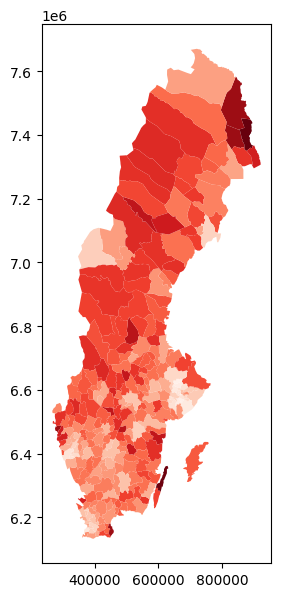

In [84]:
res.plot(column='share_65+',figsize=(7,7), cmap='Reds')

Voilà!

We can also use boolean selectors to check specific regions. Let's create a new column with only the two first digits of all ids'. (The first two digits of a municipality code is the regional code.) 
To do this, we will use a very handy technique that havn't been covered in the course: the `.apply()` method. This is a method that takes any function as an argument, and then applies it to each row in the series. So, let's start by creating a function that simply returns the first two digits of the passed argument:

In [85]:
def return_first_two_digits(string_value):
    return string_value[:2]

We can see if it works as excpected. I will give the argument `0180` as an argument, which is the municipal code of Stockholm:

In [86]:
return_first_two_digits('0180')

'01'

Perfect! If we now pass this function as an argument to the `.apply()` method, it will run the function on all items in the series:

In [89]:
res['id'].apply(return_first_two_digits).head()

0    01
1    01
2    01
3    01
4    01
Name: id, dtype: object

Nice, let's save that into a new column called `reg_id`:

In [90]:
res['reg_id'] = res['id'].apply(return_first_two_digits)

We can now filter a specific region and plot a heatmap of the results. Let us start with Skåne (regional code "12"):

In [92]:
res[res['reg_id']=='12'].head()

,id,name,geometry,share_65+,reg_id
95,1214,Svalöv,"MULTIPOLYGON (((386971.922 6196594.432, 385003...",0.183672,12
96,1230,Staffanstorp,"MULTIPOLYGON (((391601.873 6172705.471, 393981...",0.177384,12
97,1231,Burlöv,"MULTIPOLYGON (((379738.737 6164382.764, 378651...",0.170053,12
98,1233,Vellinge,"MULTIPOLYGON (((361754.020 6141755.669, 362106...",0.229291,12
99,1256,Östra Göinge,"MULTIPOLYGON (((445950.009 6247314.247, 448577...",0.228579,12


<Axes: >

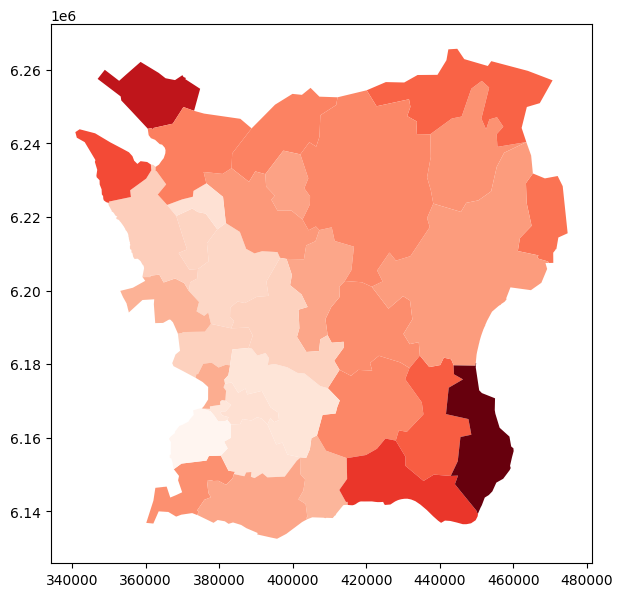

In [93]:
res[res['reg_id']=='12'].plot(column='share_65+',figsize=(7,7), cmap='Reds')

How about Stockholm ("01")?

<Axes: >

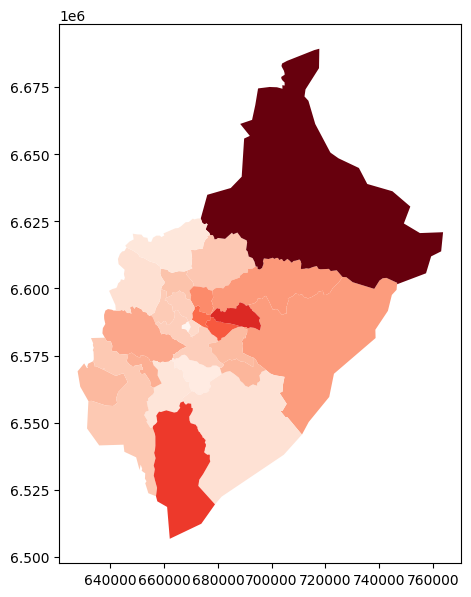

In [94]:
res[res['reg_id']=='01'].plot(column='share_65+',figsize=(7,7), cmap='Reds')

How about "Norrland", the most northern region in Sweden?

<Axes: >

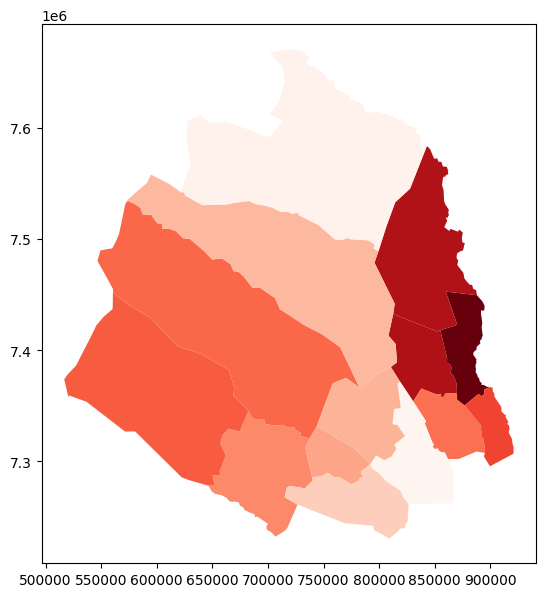

In [98]:
res[res['reg_id']=='25'].plot(column='share_65+',figsize=(7,7), cmap='Reds')

Here we can see that the municipalitites in the east (along Finlands border), there seem to be an overrepresentation of senior citizens. Also, there are two municipalities that seem to stand out on how much fewer seniors there are. What are there names? There are techniques to plot text from other columns in the geodataframe. I won't go into detail how this works (you can see [this thread on SO](https://stackoverflow.com/questions/38899190/geopandas-label-polygons) for example if you want more information), I'll just use the code:

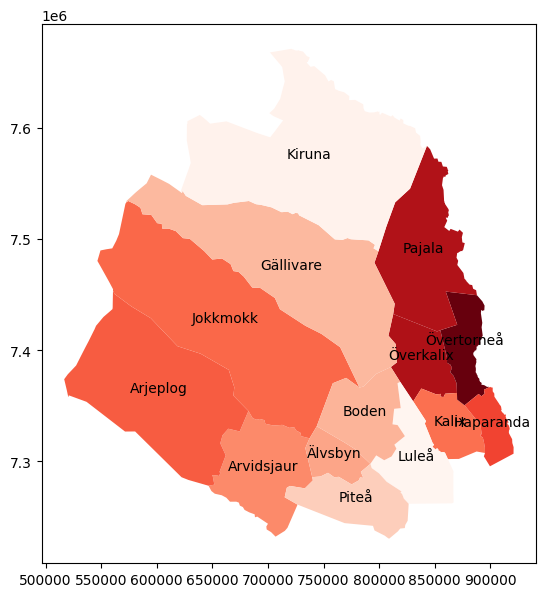

In [100]:
temp = res[res['reg_id']=='25']

ax = temp.plot(column='share_65+',figsize=(7,7), cmap='Reds')

temp.apply(lambda x: ax.annotate(text=x['name'],
                                 xy=x.geometry.centroid.coords[0],
                                 ha='center'), axis=1);

Ok, so Kiruna is a mining community, with loads of jobs in the mining sector (same with Gällivare, but to a lesser extent). So it makes sense that there are less percentage of seniors there. Luleå is the most northern university city in Sweden, which also means that there are more young people. 

**7.4.3 – does shootings creep closer to kindergardens?**

First, let's do our imports:

In [1]:
import pandas as pd
import geopandas as gpd

...and load our data from the file in the `course_material` directory

In [2]:
gdf = gpd.read_file('../course_material/geo/shootings_data.geojson')

Load kindergarden data:

In [4]:
preeschool = gpd.read_file('../course_material/geo/swe_preschools.geojson')

In [7]:
preeschool = preeschool[['fid','Firmabenämning','geometry']]
preeschool.columns = ['id','name','geometry']

In [9]:
gdf = gdf.sjoin_nearest(preeschool,how='left',distance_col='dist_m')

In [12]:
gdf = gdf.drop('index_right',axis=1)

Ok, so we added closest kindergardens to the shooting data, and included a column with the distance. We now need to group the data by year. Let's drop the columns we don't need:

In [16]:
gdf = gdf[['date','dead','injured','dist_m']]

I will also create a column called `count` with `1` for eeach row, so we can count the amount of shootings (each row is one shooting):

In [17]:
gdf['count'] = 1

/var/folders/l_/dn3z3xv17xddwrgpxsn4zgqr0000gp/T/ipykernel_5938/490686728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['count'] = 1


Grouping by year can be done in a number of ways. You can, for example, extract the year from the `date` column, using the `.strftime()` method (you can read [more about that here](https://www.programiz.com/python-programming/datetime/strftime)). But here, I will use a `pd.Grouper` class object ([read more about that here](https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year)). But to do so, I need to set the date column as our index:

In [25]:
gdf = gdf.set_index('date')

I can now group the data with a grouper object. The grouper object has the parameter `freq`, and by setting this to "Y", our `.groupby()` method will return the grouping by year:

In [27]:
gdf.groupby(pd.Grouper(freq='Y')).sum()

,dead,injured,dist_m,count
date,,,,
2018-12-31,35,114,213790.805500,319
2019-12-31,39,107,411577.605083,356
2020-12-31,43,107,215523.831205,375
2021-12-31,46,114,224062.637866,341
2022-12-31,60,101,225317.451367,381


The `.sum()` method above returns the grouping summarized. So we can see that 2022 there was a record in total amount of shootings (381) and how many people that died as a result (60). But the exercise asked if the average distance to kindergardens had shrunk. To check that we need to use the `.mean()` method to see the average. I will also plot the result from the `dist_m` column into a bar chart to see how this have changed over time:

<Axes: xlabel='date'>

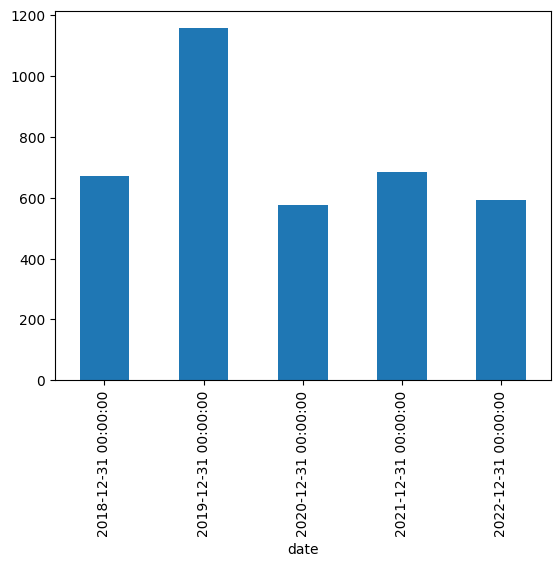

In [29]:
gdf.groupby(pd.Grouper(freq='Y')).mean()['dist_m'].plot(kind='bar')

Ok, so according to the data, the distance to kindergardens hasn't changed considerably. Let's try this again, but this time only focus on deadly shootings:

<Axes: xlabel='date'>

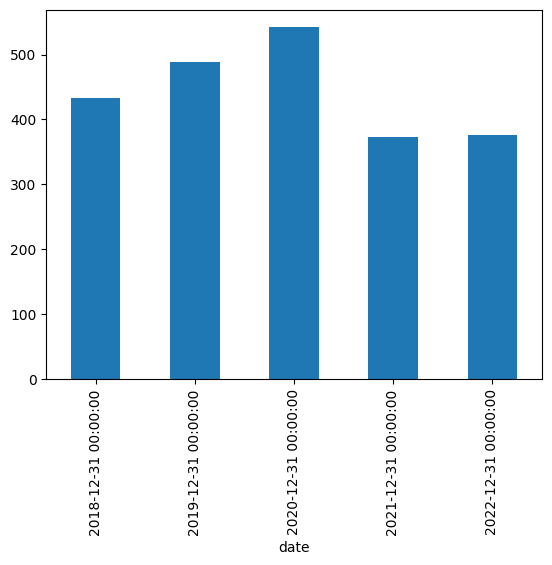

In [34]:
gdf[gdf['dead'] > 0].groupby(pd.Grouper(freq='Y')).mean()['dist_m'].plot(kind='bar')

Lethal shootings in 2021 and 2022 was considerably closer to kindergardens, compared to 2018-2020.